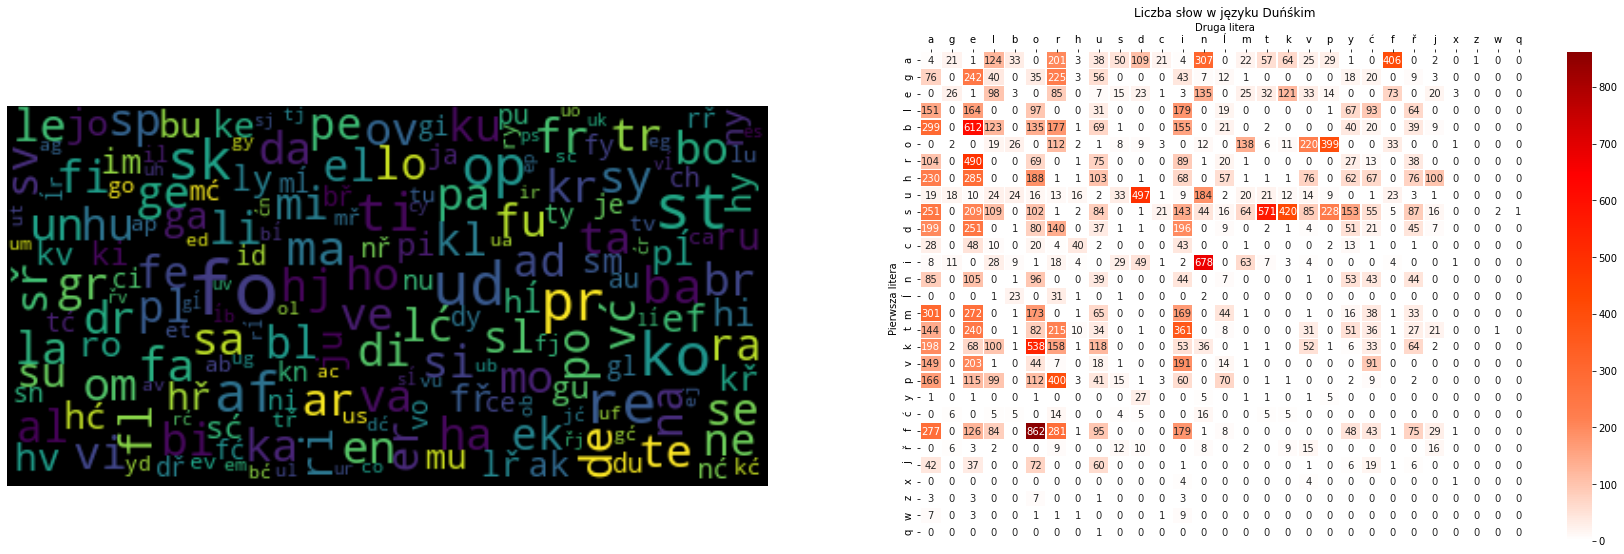

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.colors as clr
import matplotlib.colors as mcolors

file = open("dansk.txt",'r',encoding="ANSI")
data = file.readlines()
file.close()

word_list=[]
for i in range(len(data)):
    word_list.append(data[i].replace("\n",""))

letter_list=[]

for i in range(len(word_list)):
    for j in range(len(word_list[i])):
        letter = word_list[i][j]
        if(letter not in letter_list and letter!="'"):
            letter_list.append(letter)

pairs_list=[]
values_list=[]

for i in range(len(letter_list)):
    for j in range(len(letter_list)):
        pair = letter_list[i] + letter_list[j]
        pairs_list.append(pair)
        
for i in range(len(pairs_list)):
    licznik = 0
    for j in range(len(word_list)):
        a = word_list[j][:2]
        if(pairs_list[i] == a):
            licznik+=1
    values_list.append(licznik)

lista=[]

for i in range(len(letter_list)):
    lista_pom=[]
    lista_pom=values_list[len(letter_list)*i:(len(letter_list)*i)+len(letter_list)]
    lista.append(lista_pom)
    
wynik=0

for i in range(len(lista)):
    wynik= wynik + sum(lista[i])
    
cmap = clr.LinearSegmentedColormap.from_list('',['white','coral','orangered','red','darkred'])

maximum = 0

for i in range(len(lista)):
    for j in range(len(lista[i])):
        if(lista[i][j] > maximum):
            maximum = lista[i][j]

            
text = ""

for i in range(len(word_list)):
    if(word_list[i][:2] in pairs_list):
        text = text + str(word_list[i][:2] + " ")
    
divnorm = mcolors.TwoSlopeNorm(vmin=0, vcenter=maximum/2, vmax=maximum)

fig , axes = plt.subplots(1,2,figsize=(30,9))

axes[1] = sns.heatmap(lista,xticklabels=letter_list,yticklabels=letter_list,annot=True,fmt='d',linewidths=.5,cmap=cmap)
axes[1].set_title("Liczba słow w języku Duńśkim")
axes[1].xaxis.tick_top()
axes[1].set_xlabel("Druga litera")
axes[1].set_ylabel("Pierwsza litera ")
axes[1].xaxis.set_label_position("top")

wordcloud = WordCloud(collocations=False,max_font_size=40).generate(str(text))
axes[0].imshow(wordcloud,interpolation='bilinear')
axes[0].axis("off")

plt.savefig('10_str_277094.jpeg')